In [2]:
#Імпорт необхідних бібліотек
import math as m
import numpy as nmp
import pandas as pnd
import matplotlib.pyplot as ppl
import tensorflow as tf

from tensorflow import keras as ks
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential as sql
from tensorflow.keras.layers import Dense as dn
from tensorflow.keras.layers import Flatten as fl
from tensorflow.keras.datasets import mnist as mn

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2947 - accuracy: 0.9134 - val_loss: 0.1511 - val_accuracy: 0.9544
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1327 - accuracy: 0.9598 - val_loss: 0.1091 - val_accuracy: 0.9680
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0988 - accuracy: 0.9692 - val_loss: 0.1057 - val_accuracy: 0.9686
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0781 - accuracy: 0.9758 - val_loss: 0.1059 - val_accuracy: 0.9669
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0652 - accuracy: 0.9799 - val_loss: 0.1062 - val_accuracy: 0.9664
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0542 - accuracy: 0.9829 - val_loss: 0.0958 - val_accuracy: 0.9705
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0476 - accuracy: 0.9845 - val_loss: 0.0965 - val_accuracy:

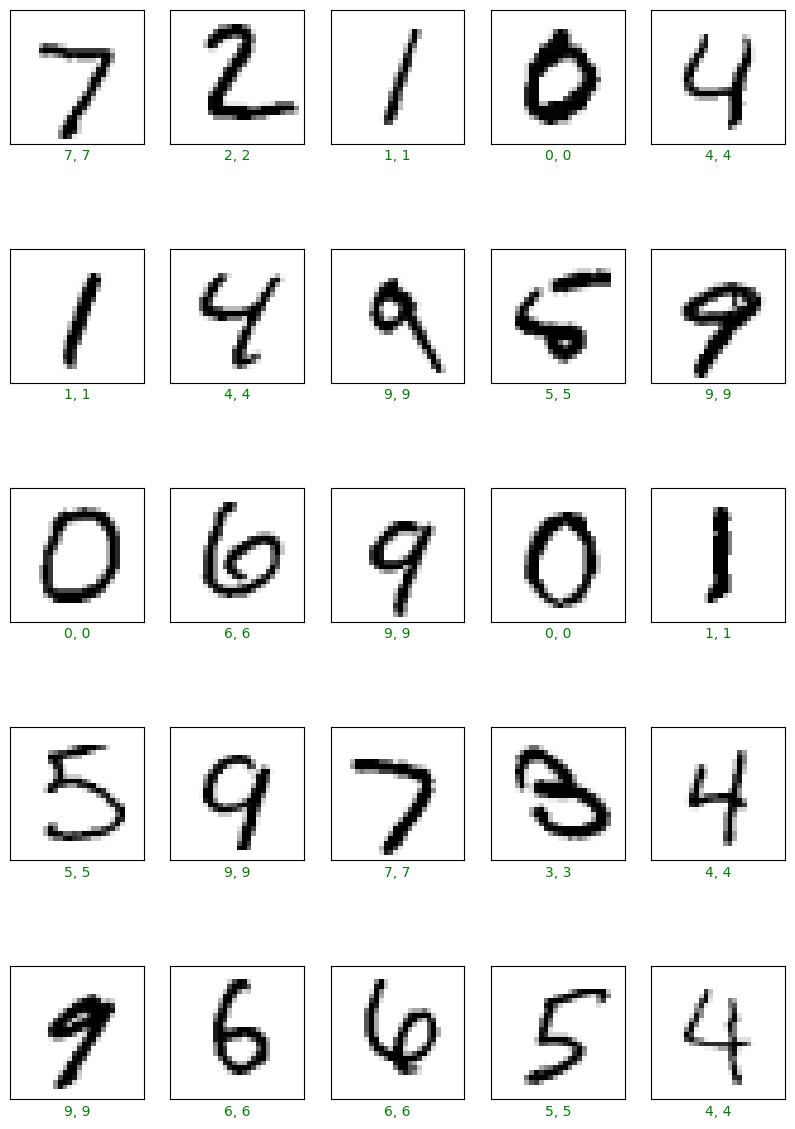

In [5]:
(traindata, trainlabels), (testdata, testlabels) = mn.load_data()
traind = traindata / 255.0
testd = testdata / 255.0
tf.random.set_seed(13)
mdl = sql([fl(input_shape=(28, 28)), dn(64, activation='relu'), dn(32, activation='relu'), dn(10, activation='softmax')])
mdl.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
hist = mdl.fit(traind, trainlabels, epochs=10, validation_data=(testd, testlabels))
testl, testac = mdl.evaluate(testd, testlabels)
print('Test accuracy: ', testac)
pred = mdl.predict(testd)
ppl.figure(figsize=(10, 15))
for i in range(25):
    ppl.subplot(5, 5, i+1)
    ppl.imshow(testd[i], cmap=ppl.cm.binary)
    ppl.xticks([])
    ppl.yticks([])
    ppl.grid(False)
    plabel = tf.argmax(pred[i])
    label = testlabels[i]
    if plabel == label:
        c = 'green'
    else:
        c = 'black'
    ppl.xlabel(f'{label}, {plabel}', color=c)
ppl.show(close=None, block=None)